In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Вспомогательные функции
Функция для приближённого вычисления производной в точке (уменьшает приращение пока изменение функции не станет незначительным)

In [2]:
def derivative(func, x, eps = 0.0001, max_iters = 1000):
    h = 1.0
    der_prev = None
    iteration = 1
    while True:
        #Estimate derivative
        der = (func(x + h) - func(x - h)) / (2 * h)
        if not np.isfinite(der):
            raise Exception('Got infinite value or NaN')
        if iteration > max_iters:
            raise Exception('Could not converge in {} iterations'.format(max_iters))
        if (iteration > 1) and (abs(der - der_prev) < eps):
            return der
        # Update values for the next iteration.
        der_prev = der
        h /= 2
        iteration += 1

Функция, которая принимает на вход функцию $f(x)$ и почту $x_0$ и возвращает новую функцию $y(x)$ - касательную к $f(x)$ в точке $x_0$:

In [3]:
def tangent(func, x_0):
    return lambda x:derivative(func, x_0) * (x - x_0) + func(x_0)

## Функция $x^3 - 3x$

In [4]:
def f1(x):
    return x**3 - 3*x

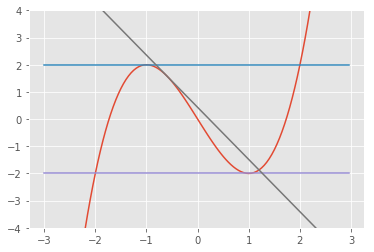

In [5]:
#Сетка значений x, в которых будем считать значения функций для построения графиков

x_grid = np.arange(-3.0, 3.0, 0.05)

#График функции
plt.plot(x_grid, f1(x_grid))

#Графики касательных в нескольких точках
plt.plot(x_grid, tangent(f1, -1.0)(x_grid))
plt.plot(x_grid, tangent(f1, 1.0)(x_grid))
plt.plot(x_grid, tangent(f1, -0.6)(x_grid))

#Диапазон значений по оси y
plt.ylim((-4.0, 4.0))

plt.show()

Функция имеет локальные экстремумы в точках $\pm 1$. В этих точках производная равна нулю, график касательной горизонтален.

## Функция $x^3$

In [6]:
def f2(x):
    return x**3

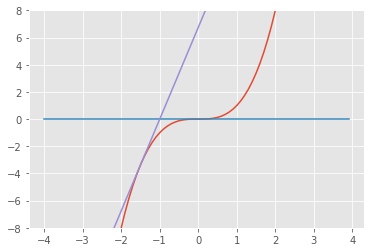

In [7]:
#Сетка значений x, в которых будем считать значения функций для построения графиков

x_grid = np.arange(-4.0, 4.0, 0.1)

#График функции
plt.plot(x_grid, f2(x_grid))

#Графики касательных в нескольких точках
plt.plot(x_grid, tangent(f2, 0.0)(x_grid))
plt.plot(x_grid, tangent(f2, -1.5)(x_grid))

#Диапазон значений по оси y
plt.ylim((-8.0, 8.0))

plt.show()

В этом случае производная обращается в ноль в точке $x=0$, касательная в этой точке горизонтальная, тем не менее, функция не имеет экстремума в этой точке.

Можно сказать, что приближаясь к точке $x = 0$, рост функции замедляется, "на мгновение замирает" в точке $x = 0$, а после этого вновь продолжает двигаться в прежнем направлении.